In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op
import re
import glob

In [2]:
def sortKeyFunc(s):
    return int(os.path.basename(s)[0:])

folders = ["213-222"]

Methods = []

for folder in folders:
    Methods.append(sorted(glob.glob("../data/" + folder + "/*/method")))

In [3]:
def sortKeyFunc(s):
    return int(os.path.basename(s)[-7:-4])

resultsPaths = []

for folder in folders:
    resultsPaths.append(sorted(glob.glob("../data/"+ folder +"/results/*.csv"), key=sortKeyFunc))

series = []
for paths in resultsPaths:
    resultsaux = []
    for path in paths:
        resultsaux.append(np.genfromtxt(path, skip_header=1, delimiter=",").transpose())
    series.append(resultsaux)

In [4]:
BvaluesMat = [] # IMPORTA PARAMETROS
GradSepMat = []
GradDurMat = []

# BvaluesMat va a ser un array multidimensional en el cual van a estar guardados todos los B values utilizados por cada medida por cada serie por cada carpeta (experimento).

for serie in Methods:
    BvaluesMat1 = [] 
    GradSepList = []
    GradDurList = []
    for method in serie:
        var = open(method)
        var = var.read().split("##")
        result = [i for i in var if i.startswith('$PVM_DwEffBval')][0].split("\n")[1:-1]

        Bvalues1 = ""
        for string in result:
            Bvalues1 = Bvalues1 + string
            
        Bvalues1 = Bvalues1.split(" ")
        Bvalues1 = list(map(float, Bvalues1))

        BvaluesMat1.append(Bvalues1)

        result = [i for i in var if i.startswith('$PVM_DwGradSep')][0].split("\n")[1]
        GradSep1 = float(result)
        result = [i for i in var if i.startswith('$PVM_DwGradDur')][0].split("\n")[1]
        GradDur1 = float(result)

        GradSepList.append(GradSep1)
        GradDurList.append(GradDur1)

    BvaluesMat.append(np.array(BvaluesMat1))
    GradSepMat.append(np.array(GradSepList))
    GradDurMat.append(np.array(GradDurList))

In [6]:
def exp(b, A, D):
    return A * np.exp((-1) * b * D)

def BtoG(B, td, delta):
    return

In [7]:
 serie_params = []

 for serie, B_serie in zip(series, BvaluesMat):
   params = []
   for result, Bvalues in zip(serie, B_serie):
      aux = [0,0,0]
      aux[0],_ = op.curve_fit(exp, Bvalues, result[2], p0=[200,0.001])
      aux[1],_ = op.curve_fit(exp, Bvalues, result[6], p0=[5000, 0.001])
      aux[2],_ = op.curve_fit(exp, Bvalues, result[10], p0=[5000,0.001])
      params.append(aux)
   serie_params.append(params)

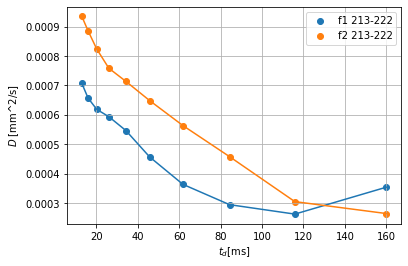

In [8]:
# PLOTEAR TODAS LAS SERIES CARGADAS

for name, serie, gradsep, graddur in zip(folders, serie_params, GradSepMat, GradDurMat):
    td = gradsep - graddur/3

    Df1 = np.array(serie)[:,:,1].transpose()[0]
    Df2 = np.array(serie)[:,:,1].transpose()[1]
    Dagua = np.array(serie)[:,:,1].transpose()[2]

    # plt.scatter(td, Dagua, label="agua " + name)
    # plt.plot(td, Dagua)

    plt.scatter(td, Df1, label="f1 " + name)
    plt.plot(td, Df1)

    plt.scatter(td, Df2, label="f2 " + name)
    plt.plot(td, Df2)

plt.xlabel("$t_d$[ms]")
plt.ylabel("$D$ [mm^2/s]")

# plt.xscale("log")
# plt.yscale("log")

plt.legend()
plt.grid()

plt.savefig("")

plt.show()